# PIL

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
dir = 'D:/code/python/augment/502.png'

图像读入

In [2]:
im_pil = Image.open(dir)# 读入为一个对象
print(im_pil.format)# 图像格式
print(im_pil.size)# 图像尺寸，（w,h），和opencv的（h,w,c）不一致
print(im_pil.mode) # #L为灰度图，RGB为真彩色,RGBA为加了透明通道
im_pil.show() # 会和opencv一样单独跳出窗口

PNG
(200, 200)
RGB


转化为numpy

uint8
(200, 200, 3)


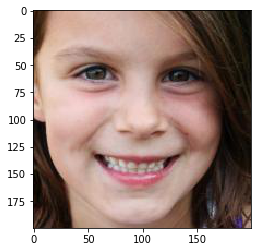

In [3]:
im_numpy = np.array(im_pil)
print(im_numpy.dtype)
print(im_numpy.shape)
plt.imshow(im_numpy)

RGB转化为灰度图

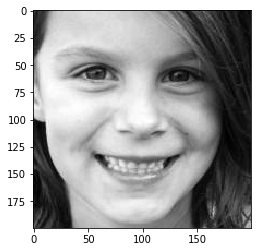

In [4]:
im_pil_gray = im_pil.convert('L')
im_pil_gray_np = np.array(im_pil_gray)
plt.imshow(im_pil_gray_np, cmap = 'gray')

灰度图转化为RGB,这里通道数变为了3，但是每个通道都一致，所以显示出来还是灰度图的样子

(200, 200, 3)


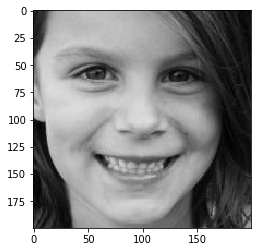

In [5]:
im_pil_rgb = im_pil_gray.convert('RGB')
im_pil_rgb_np = np.array(im_pil_rgb)
print(im_pil_rgb_np.shape)
plt.imshow(im_pil_rgb_np)

通道转换

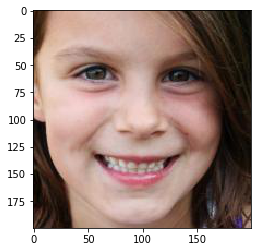

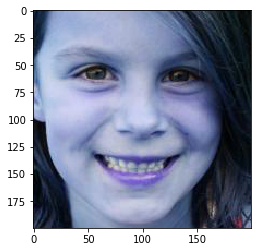

In [6]:
im_pil = Image.open(dir)# 读入为一个对象
im_pil_np = np.array(im_pil)
plt.figure()
plt.imshow(im_pil_np)
r,g,b = im_pil.split()
im_pil_bgr = Image.merge("RGB",(b,g,r))
im_pil_bgr_np = np.array(im_pil_bgr)
plt.figure()
plt.imshow(im_pil_bgr_np)


从numpy写入新图片

In [7]:
dir_w = 'D:/code/python/augment/502_pil.png'
img_w = Image.fromarray(im_pil_bgr_np)
img_w.save(dir_w)

复制图像，以及获取roi

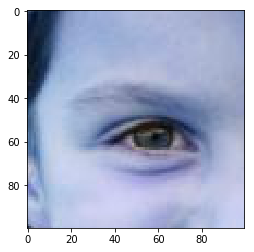

In [8]:
im_copy = img_w.copy()
im_crop = im_copy.crop((0,0,100,100)) #(左上x，左上y，右下x，右下y)坐标
im_crop_np = np.array(im_crop)
plt.imshow(im_crop_np)

# matplotlib.pyplot

(200, 200, 3)


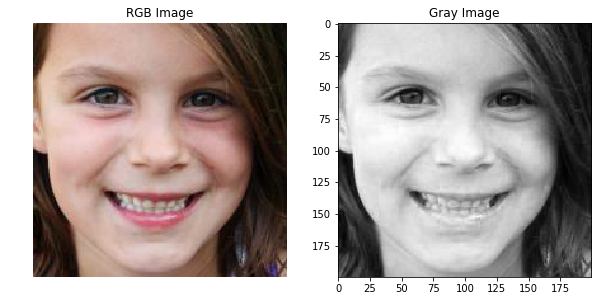

In [12]:
im_plt = plt.imread(dir) # 读入为numpy，RGB
figure = plt.figure(figsize = (10,5))# 设置图片大小
ax = figure.add_subplot(121) # 设置子图
print(im_plt.shape) # (h,w,c)和opencv一样
plt.axis('off') # 关闭坐标轴显示
ax.imshow(im_plt)
ax.set_title('RGB Image')
im_plt_r = im_plt[:,:,0]
ax = figure.add_subplot(122)
ax.imshow(im_plt_r, cmap = 'gray')
ax.set_title('Gray Image')
dir_w = 'D:/code/python/augment/502_plt.png'
plt.savefig(dir_w)
plt.show()

# scipy.misc 此库即将改为imageio

In [16]:
import imageio

In [19]:
im_misc = imageio.imread(dir) # 读入为numpy （h,w,c）
print(im_misc.shape)
print(im_misc.dtype)
imageio.imsave('D:/code/python/augment/502_misc.png',im_misc)

(200, 200, 3)
uint8


# skimage.io

In [22]:
from skimage import io

读写与显示

(200, 200, 3)
uint8


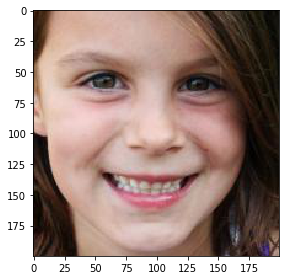

In [23]:
im_io = io.imread(dir) # numpy矩阵
print(im_io.shape) # (h,w,c)
print(im_io.dtype)
io.imshow(im_io)# 只有io和plt可以在notebook中直接显示，其他的都是弹窗显示
io.imsave('D:/code/python/augment/502_io.png',im_io)

RGB转换为灰度图

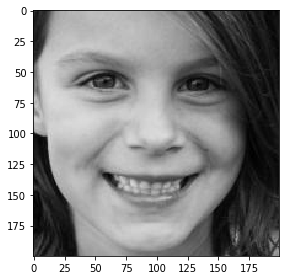

In [29]:
from skimage import color
im_io = io.imread(dir)
im_io_gray = color.rgb2gray(im_io)
io.imshow(im_io_gray)

读入为灰度图

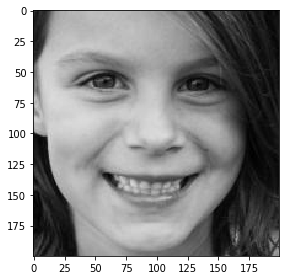

In [30]:
im_io_gray = io.imread(dir, as_gray = 'True') # 读入为灰度图
io.imshow(im_io_gray)

# 总结

## 除了opencv读入的彩色图片以BGR顺序存储外，其他所有图像库读入彩色图片都以RGB存储。
## 除了PIL读入的图片是img类之外，其他库读进来的图片都是以numpy 矩阵。
## opencv无论读写还是操作速度都要比其他几个库快很多，推荐用opencv